<a href="https://colab.research.google.com/github/Ritapaz/projeto/blob/main/Simula%C3%A7%C3%A3o_Log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simulação de chegada de caminhões para atendimento em um armazém.


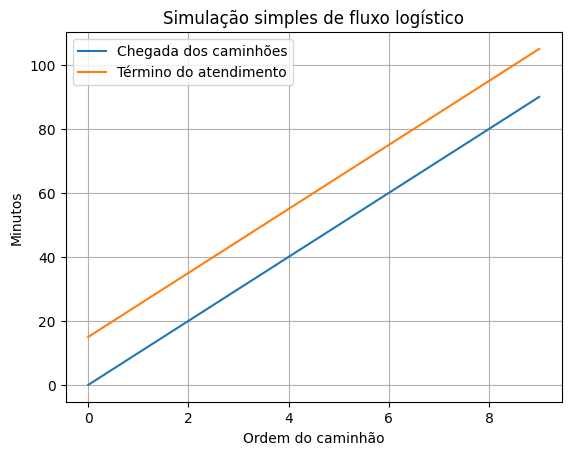

In [3]:
import random
import matplotlib.pyplot as plt

chegadas = [i * 10 for i in range(10)]  # caminhões a cada 10 min
atendimentos = [chegada + 15 for chegada in chegadas]  # tempo fixo de atendimento

plt.plot(chegadas, label="Chegada dos caminhões")
plt.plot(atendimentos, label="Término do atendimento")
plt.xlabel("Ordem do caminhão")
plt.ylabel("Minutos")
plt.legend()
plt.title("Simulação simples de fluxo logístico")
plt.grid(True)
plt.show()


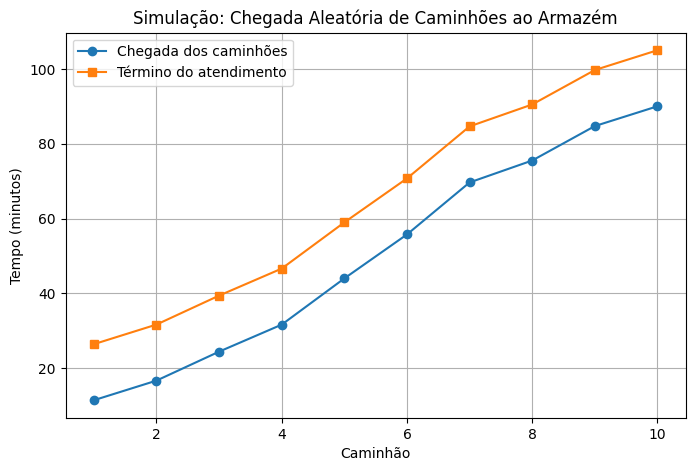

Tempo médio entre chegadas: 9.01 minutos


In [4]:
import random
import matplotlib.pyplot as plt

# Definindo semente para reprodutibilidade
random.seed(42)

# Número de caminhões simulados
num_caminhoes = 10

# Geração dos tempos de chegada aleatórios
# Suponha que o tempo entre chegadas siga uma distribuição uniforme de 5 a 15 minutos
intervalos = [random.uniform(5, 15) for _ in range(num_caminhoes)]

# Calcula o tempo acumulado de chegada (soma dos intervalos)
chegadas = [sum(intervalos[:i+1]) for i in range(num_caminhoes)]

# Tempo fixo de atendimento (15 minutos)
atendimentos = [chegada + 15 for chegada in chegadas]

# Visualização
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_caminhoes + 1), chegadas, marker='o', label="Chegada dos caminhões")
plt.plot(range(1, num_caminhoes + 1), atendimentos, marker='s', label="Término do atendimento")
plt.xlabel("Caminhão")
plt.ylabel("Tempo (minutos)")
plt.title("Simulação: Chegada Aleatória de Caminhões ao Armazém")
plt.legend()
plt.grid(True)
plt.show()

# Mostra tempos médios
media_intervalo = sum(intervalos) / len(intervalos)
print(f"Tempo médio entre chegadas: {media_intervalo:.2f} minutos")


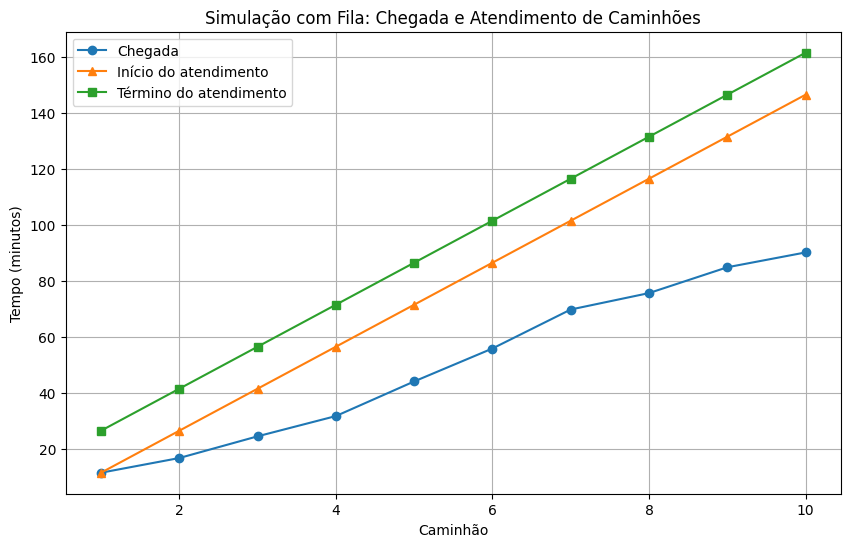

Tempo médio de espera: 28.51 minutos
Tempo médio total no sistema: 43.51 minutos


In [ ]:
import random
import matplotlib.pyplot as plt

# Semente para resultados reproduzíveis
random.seed(42)

# Número de caminhões
num_caminhoes = 10

# Tempos entre chegadas (distribuição uniforme entre 5 e 15 minutos)
intervalos_chegada = [random.uniform(5, 15) for _ in range(num_caminhoes)]

# Tempo de chegada acumulado
tempos_chegada = [sum(intervalos_chegada[:i+1]) for i in range(num_caminhoes)]

# Tempo fixo de atendimento por caminhão
tempo_atendimento = 15

# Inicialização das listas de horários de início e fim do atendimento
inicios_atendimento = []
fins_atendimento = []

for i in range(num_caminhoes):
    if i == 0:
        inicio = tempos_chegada[i]
    else:
        # Começa a ser atendido quando chega ou quando o anterior termina, o que for mais tarde
        inicio = max(tempos_chegada[i], fins_atendimento[i-1])
    fim = inicio + tempo_atendimento

    inicios_atendimento.append(inicio)
    fins_atendimento.append(fim)

# Tempo de espera de cada caminhão
tempos_espera = [inicios_atendimento[i] - tempos_chegada[i] for i in range(num_caminhoes)]
tempos_totais = [fins_atendimento[i] - tempos_chegada[i] for i in range(num_caminhoes)]

# Gráfico do processo
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_caminhoes + 1), tempos_chegada, marker='o', label="Chegada")
plt.plot(range(1, num_caminhoes + 1), inicios_atendimento, marker='^', label="Início do atendimento")
plt.plot(range(1, num_caminhoes + 1), fins_atendimento, marker='s', label="Término do atendimento")

plt.xlabel("Caminhão")
plt.ylabel("Tempo (minutos)")
plt.title("Simulação com Fila: Chegada e Atendimento de Caminhões")
plt.grid(True)
plt.legend()
plt.show()

# Estatísticas
tempo_medio_espera = sum(tempos_espera) / len(tempos_espera)
tempo_medio_total = sum(tempos_totais) / len(tempos_totais)

print(f"Tempo médio de espera: {tempo_medio_espera:.2f} minutos")
print(f"Tempo médio total no sistema: {tempo_medio_total:.2f} minutos")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider, FloatSlider

def simular_fila_logistica(num_caminhoes=10, intervalo_min=5, intervalo_max=15, tempo_atendimento=15):
    np.random.seed(42)

    # Tempos entre chegadas aleatórios
    intervalos_chegada = np.random.uniform(intervalo_min, intervalo_max, size=num_caminhoes)
    tempos_chegada = np.cumsum(intervalos_chegada)

    inicios_atendimento = []
    fins_atendimento = []

    for i in range(num_caminhoes):
        if i == 0:
            inicio = tempos_chegada[i]
        else:
            inicio = max(tempos_chegada[i], fins_atendimento[i-1])
        fim = inicio + tempo_atendimento
        inicios_atendimento.append(inicio)
        fins_atendimento.append(fim)

    tempos_espera = [inicios_atendimento[i] - tempos_chegada[i] for i in range(num_caminhoes)]
    tempos_totais = [fins_atendimento[i] - tempos_chegada[i] for i in range(num_caminhoes)]

    # Gráfico
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, num_caminhoes + 1), tempos_chegada, marker='o', label="Chegada")
    plt.plot(range(1, num_caminhoes + 1), inicios_atendimento, marker='^', label="Início Atendimento")
    plt.plot(range(1, num_caminhoes + 1), fins_atendimento, marker='s', label="Fim Atendimento")
    plt.xlabel("Caminhão")
    plt.ylabel("Tempo (minutos)")
    plt.title("Simulação com Fila: Chegada e Atendimento de Caminhões")
    plt.grid(True)
    plt.legend()
    plt.show()

    print(f"Tempo médio de espera: {np.mean(tempos_espera):.2f} minutos")
    print(f"Tempo médio total no sistema: {np.mean(tempos_totais):.2f} minutos")

interact(
    simular_fila_logistica,
    num_caminhoes=IntSlider(min=5, max=30, step=1, value=10, description='Caminhões'),
    intervalo_min=FloatSlider(min=1, max=10, step=0.5, value=5, description='Interv. Mín'),
    intervalo_max=FloatSlider(min=10, max=30, step=0.5, value=15, description='Interv. Máx'),
    tempo_atendimento=IntSlider(min=5, max=30, step=1, value=15, description='Atendimento')
)


interactive(children=(IntSlider(value=10, description='Caminhões', max=30, min=5), FloatSlider(value=5.0, desc…

<function __main__.simular_fila_logistica(num_caminhoes=10, intervalo_min=5, intervalo_max=15, tempo_atendimento=15)>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

def simular_estoque(dias=60, estoque_inicial=100, demanda_media=10, demanda_variacao=3,
                    ponto_reposicao=40, lote_pedido=80, lead_time=5, estoque_seguranca=0):

    np.random.seed(0)
    estoque = [estoque_inicial]
    pedidos_em_transito = []
    rupturas = 0

    estoque_dia = []
    dias_ruptura = []

    for dia in range(dias):
        # Verificar chegada de pedidos
        pedidos_chegando = [q for t, q in pedidos_em_transito if t == dia]
        if pedidos_chegando:
            estoque[-1] += sum(pedidos_chegando)
        pedidos_em_transito = [(t, q) for t, q in pedidos_em_transito if t > dia]

        # Demanda aleatória
        demanda = max(0, int(np.random.normal(demanda_media, demanda_variacao)))
        novo_estoque = estoque[-1] - demanda

        if novo_estoque < 0:
            rupturas += 1
            dias_ruptura.append(dia)
            novo_estoque = 0

        # Checar ponto de reposição
        if novo_estoque <= ponto_reposicao + estoque_seguranca:
            pedidos_em_transito.append((dia + lead_time, lote_pedido))

        estoque.append(novo_estoque)
        estoque_dia.append(novo_estoque)

    # Gráfico
    plt.figure(figsize=(12, 6))
    plt.plot(range(dias), estoque_dia, marker='o', label="Estoque")
    plt.axhline(ponto_reposicao, color='r', linestyle='--', label="Ponto de Reposição")
    plt.axhline(estoque_seguranca, color='orange', linestyle='--', label="Estoque de Segurança")
    if dias_ruptura:
        plt.scatter(dias_ruptura, [0]*len(dias_ruptura), color='black', label="Ruptura", zorder=5)
    plt.title("Simulação de Estoque com Política de Reposição")
    plt.xlabel("Dias")
    plt.ylabel("Nível de Estoque")
    plt.grid(True)
    plt.legend()
    plt.show()

    print(f"🟡 Média de estoque: {np.mean(estoque_dia):.2f}")
    print(f"🔴 Dias com ruptura de estoque: {rupturas} ({rupturas/dias:.1%})")

interact(
    simular_estoque,
    dias=IntSlider(min=30, max=120, step=10, value=60, description='Dias'),
    estoque_inicial=IntSlider(min=10, max=200, step=10, value=100, description='Estoque Inicial'),
    demanda_media=IntSlider(min=5, max=50, step=1, value=10, description='Demanda Média'),
    demanda_variacao=IntSlider(min=0, max=20, step=1, value=3, description='Variação'),
    ponto_reposicao=IntSlider(min=10, max=100, step=5, value=40, description='Ponto Rep.'),
    lote_pedido=IntSlider(min=20, max=200, step=10, value=80, description='Lote Pedido'),
    lead_time=IntSlider(min=1, max=15, step=1, value=5, description='Lead Time'),
    estoque_seguranca=IntSlider(min=0, max=50, step=5, value=0, description='Segurança')
)


interactive(children=(IntSlider(value=60, description='Dias', max=120, min=30, step=10), IntSlider(value=100, …

<function __main__.simular_estoque(dias=60, estoque_inicial=100, demanda_media=10, demanda_variacao=3, ponto_reposicao=40, lote_pedido=80, lead_time=5, estoque_seguranca=0)>

In [ ]:
pip install simpy

Caminhão 1 chegou às 3.70
Caminhão 1 começou a carregar após 0.00 minutos de espera
Caminhão 2 chegou às 14.26
Caminhão 2 começou a carregar após 0.00 minutos de espera
Caminhão 3 chegou às 14.66
Caminhão 4 chegou às 17.99
Caminhão 1 terminou às 18.70
Caminhão 3 começou a carregar após 4.04 minutos de espera
Caminhão 2 terminou às 29.26
Caminhão 4 começou a carregar após 11.27 minutos de espera
Caminhão 3 terminou às 33.70
Caminhão 5 chegou às 33.73
Caminhão 5 começou a carregar após 0.00 minutos de espera
Caminhão 4 terminou às 44.26
Caminhão 6 chegou às 45.54
Caminhão 6 começou a carregar após 0.00 minutos de espera
Caminhão 5 terminou às 48.73
Caminhão 7 chegou às 49.28
Caminhão 7 começou a carregar após 0.00 minutos de espera
Caminhão 6 terminou às 60.54
Caminhão 8 chegou às 62.62
Caminhão 8 começou a carregar após 0.00 minutos de espera
Caminhão 7 terminou às 64.28
Caminhão 8 terminou às 77.62
Caminhão 9 chegou às 87.49
Caminhão 9 começou a carregar após 0.00 minutos de espera
Cam

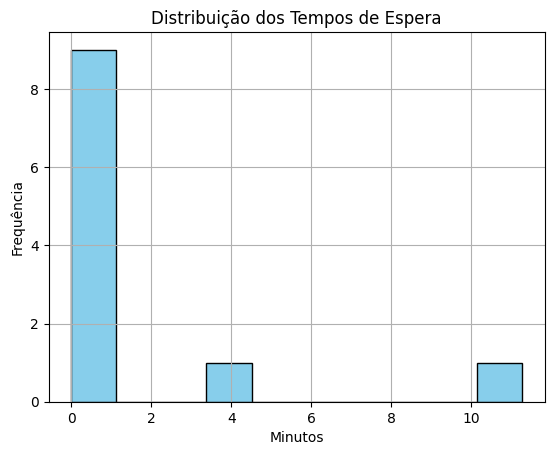

In [ ]:
import simpy
import random
import matplotlib.pyplot as plt

TEMPO_SIMULACAO = 120  # minutos
TEMPO_ATENDIMENTO = 15  # minutos
CHEGADAS_POR_HORA = 4  # média de caminhões/hora

chegadas = []
esperas = []

def caminhão(env, nome, docas):
    chegada = env.now
    chegadas.append(chegada)
    print(f"{nome} chegou às {chegada:.2f}")

    with docas.request() as req:
        yield req
        espera = env.now - chegada
        esperas.append(espera)
        print(f"{nome} começou a carregar após {espera:.2f} minutos de espera")
        yield env.timeout(TEMPO_ATENDIMENTO)
        print(f"{nome} terminou às {env.now:.2f}")

def chegada_caminhoes(env, docas):
    i = 0
    while True:
        yield env.timeout(random.expovariate(CHEGADAS_POR_HORA / 60))
        i += 1
        env.process(caminhão(env, f'Caminhão {i}', docas))

env = simpy.Environment()
docas = simpy.Resource(env, capacity=2)
env.process(chegada_caminhoes(env, docas))
env.run(until=TEMPO_SIMULACAO)

# Análise gráfica
plt.hist(esperas, bins=10, color='skyblue', edgecolor='black')
plt.title("Distribuição dos Tempos de Espera")
plt.xlabel("Minutos")
plt.ylabel("Frequência")
plt.grid(True)
plt.show()


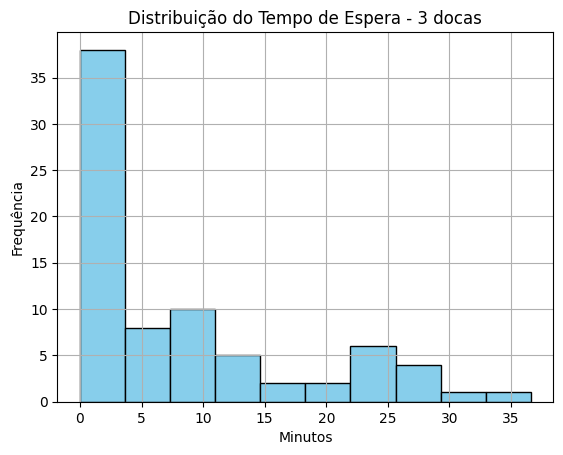

Tempo médio de espera: 7.93 minutos
Número de caminhões atendidos: 77


In [ ]:
import simpy
import random
import matplotlib.pyplot as plt

TEMPO_SIMULACAO = 500
TEMPO_ATENDIMENTO = 15
TAXA_CHEGADA = 10  # caminhões por hora

esperas = []

def caminhão(env, nome, docas):
    chegada = env.now
    with docas.request() as req:
        yield req
        espera = env.now - chegada
        esperas.append(espera)
        yield env.timeout(TEMPO_ATENDIMENTO)

def chegada_caminhoes(env, docas):
    i = 0
    while True:
        yield env.timeout(random.expovariate(TAXA_CHEGADA / 60))
        i += 1
        env.process(caminhão(env, f'Caminhão {i}', docas))

def simular(capacidade_docas=2):
    global esperas
    esperas = []
    env = simpy.Environment()
    docas = simpy.Resource(env, capacity=capacidade_docas)
    env.process(chegada_caminhoes(env, docas))
    env.run(until=TEMPO_SIMULACAO)

    plt.hist(esperas, bins=10, color='skyblue', edgecolor='black')
    plt.title(f"Distribuição do Tempo de Espera - {capacidade_docas} docas")
    plt.xlabel("Minutos")
    plt.ylabel("Frequência")
    plt.grid(True)
    plt.show()

    print(f"Tempo médio de espera: {sum(esperas)/len(esperas):.2f} minutos")
    print(f"Número de caminhões atendidos: {len(esperas)}")

# Simular para 3 docas, por exemplo:
simular(capacidade_docas=3)


In [ ]:
import simpy
import random
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

def simular_fila(capacidade_docas, taxa_chegada, tempo_servico, tempo_total):
    random.seed(42)
    esperas = []

    def caminhão(env, nome, docas):
        chegada = env.now
        with docas.request() as req:
            yield req
            espera = env.now - chegada
            esperas.append(espera)
            yield env.timeout(tempo_servico)

    def chegada_caminhoes(env, docas):
        i = 0
        while True:
            yield env.timeout(random.expovariate(taxa_chegada / 60))
            i += 1
            env.process(caminhão(env, f'Caminhão {i}', docas))

    env = simpy.Environment()
    docas = simpy.Resource(env, capacity=capacidade_docas)
    env.process(chegada_caminhoes(env, docas))
    env.run(until=tempo_total)

    # Plot
    plt.figure(figsize=(10, 5))
    plt.hist(esperas, bins=15, color='lightblue', edgecolor='black')
    plt.title(f"Distribuição do Tempo de Espera\n{capacidade_docas} docas, chegada {taxa_chegada}/h, serviço {tempo_servico} min")
    plt.xlabel("Minutos de espera")
    plt.ylabel("Frequência")
    plt.grid(True)
    plt.show()

    print(f"Tempo médio de espera: {sum(esperas)/len(esperas):.2f} min")
    print(f"Número total de caminhões atendidos: {len(esperas)}")

interact(
    simular_fila,
    capacidade_docas=IntSlider(min=1, max=5, step=1, value=2, description='Docas'),
    taxa_chegada=IntSlider(min=2, max=20, step=1, value=5, description='Chegadas/h'),
    tempo_servico=IntSlider(min=5, max=30, step=1, value=15, description='Serviço (min)'),
    tempo_total=IntSlider(min=60, max=480, step=30, value=240, description='Tempo Sim. (min)')
)


interactive(children=(IntSlider(value=2, description='Docas', max=5, min=1), IntSlider(value=5, description='C…

<function __main__.simular_fila(capacidade_docas, taxa_chegada, tempo_servico, tempo_total)>

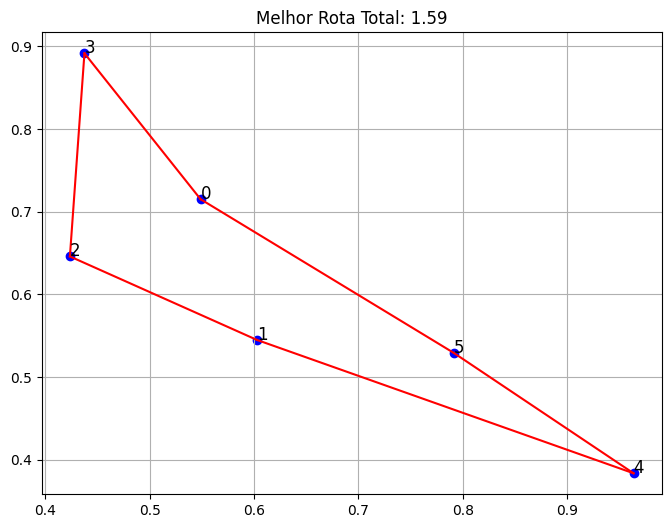

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import itertools
import numpy as np

# Gerar pontos de entrega aleatórios
np.random.seed(0)
num_pontos = 6
pontos = np.random.rand(num_pontos, 2)

# Criar grafo completo com pesos de distância euclidiana
G = nx.complete_graph(num_pontos)
for i, j in G.edges():
    dist = np.linalg.norm(pontos[i] - pontos[j])
    G.edges[i, j]['weight'] = dist

# Encontrar melhor rota (força bruta para poucos pontos)
melhor_rota = None
menor_dist = float('inf')
for perm in itertools.permutations(range(num_pontos)):
    dist = sum(G.edges[perm[i], perm[i+1]]['weight'] for i in range(len(perm)-1))
    dist += G.edges[perm[-1], perm[0]]['weight']  # volta ao início
    if dist < menor_dist:
        menor_dist = dist
        melhor_rota = perm

# Visualizar a melhor rota
plt.figure(figsize=(8, 6))
for i, ponto in enumerate(pontos):
    plt.scatter(*ponto, color='blue')
    plt.text(ponto[0], ponto[1], f'{i}', fontsize=12)
rota = list(melhor_rota) + [melhor_rota[0]]
for i in range(len(rota)-1):
    p1, p2 = pontos[rota[i]], pontos[rota[i+1]]
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'r-')
plt.title(f"Melhor Rota Total: {menor_dist:.2f}")
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import itertools
import numpy as np
from ipywidgets import interact, IntSlider

def roteirizacao_interativa(num_pontos=6, seed=0):
    if num_pontos > 9:
        print("Por favor, mantenha até 9 pontos para evitar lentidão.")
        return

    # Gerar pontos de entrega aleatórios
    np.random.seed(seed)
    pontos = np.random.rand(num_pontos, 2)

    # Criar grafo completo com pesos de distância euclidiana
    G = nx.complete_graph(num_pontos)
    for i, j in G.edges():
        dist = np.linalg.norm(pontos[i] - pontos[j])
        G.edges[i, j]['weight'] = dist

    # Encontrar melhor rota (força bruta)
    melhor_rota = None
    menor_dist = float('inf')
    for perm in itertools.permutations(range(num_pontos)):
        dist = sum(G.edges[perm[i], perm[i+1]]['weight'] for i in range(len(perm)-1))
        dist += G.edges[perm[-1], perm[0]]['weight']  # volta ao início
        if dist < menor_dist:
            menor_dist = dist
            melhor_rota = perm

    # Visualizar a melhor rota
    plt.figure(figsize=(8, 6))
    for i, ponto in enumerate(pontos):
        plt.scatter(*ponto, color='blue')
        plt.text(ponto[0], ponto[1], f'{i}', fontsize=12)
    rota = list(melhor_rota) + [melhor_rota[0]]
    for i in range(len(rota)-1):
        p1, p2 = pontos[rota[i]], pontos[rota[i+1]]
        plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'r-')
    plt.title(f"Melhor Rota Total: {menor_dist:.2f}")
    plt.grid(True)
    plt.show()

interact(
    roteirizacao_interativa,
    num_pontos=IntSlider(min=3, max=9, step=1, value=6, description='Nº Pontos'),
    seed=IntSlider(min=0, max=100, step=1, value=0, description='Seed Aleatória')
)



interactive(children=(IntSlider(value=6, description='Nº Pontos', max=9, min=3), IntSlider(value=0, descriptio…

<function __main__.roteirizacao_interativa(num_pontos=6, seed=0)>

In [ ]:
import folium
import numpy as np
from folium.plugins import AntPath

# Gerar coordenadas aleatórias em torno de um ponto base (por exemplo, centro de São Paulo)
np.random.seed(42)
base_lat, base_lon = -23.5505, -46.6333
num_pontos = 5
coordenadas = [(base_lat + np.random.uniform(-0.02, 0.02), base_lon + np.random.uniform(-0.02, 0.02))
               for _ in range(num_pontos)]

# Criar mapa base
mapa = folium.Map(location=[base_lat, base_lon], zoom_start=13)

# Adicionar marcadores
for i, (lat, lon) in enumerate(coordenadas):
    folium.Marker(location=[lat, lon], popup=f"Ponto {i}", tooltip=f"Ponto {i}").add_to(mapa)

# Criar rota simples conectando os pontos na ordem
rota = coordenadas + [coordenadas[0]]  # para voltar ao início
AntPath(rota, color='blue', weight=4.5, delay=1000).add_to(mapa)

# Exibir o mapa
mapa



In [ ]:
import simpy
import random
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider

# ===============================
# 2. Definição do modelo de fila simples (SimPy)
# ===============================
def fila(env, servidor, tempo_medio_servico):
    """Processo de atendimento: cada cliente ocupa o servidor por um tempo aleatório."""
    with servidor.request() as req:
        yield req
        tempo_servico = random.expovariate(1 / tempo_medio_servico)
        yield env.timeout(tempo_servico)

def gerar_chegadas(env, servidor, tempo_medio_chegada, tempo_medio_servico):
    """Gera chegadas de clientes em intervalos aleatórios."""
    while True:
        yield env.timeout(random.expovariate(1 / tempo_medio_chegada))
        # Call the 'fila' process directly
        env.process(fila(env, servidor, tempo_medio_servico))

# ===============================
# 3. Função para rodar uma simulação
# ===============================
def rodar_simulacao(tempo_medio_chegada=5, tempo_medio_servico=4, capacidade=1, tempo_total=100):
    env = simpy.Environment()
    servidor = simpy.Resource(env, capacity=int(capacidade))
    env.process(gerar_chegadas(env, servidor, tempo_medio_chegada, tempo_medio_servico))
    env.run(until=tempo_total)
    return env.now

# ===============================
# 4. Simulação de Monte Carlo
# ===============================
def monte_carlo(n_execucoes=200, **params):
    resultados = []
    for _ in range(n_execucoes):
        resultados.append(rodar_simulacao(**params))
    return np.array(resultados)

# ===============================
# 5. Visualização dos resultados
# ===============================
def plotar_resultados(resultados):
    plt.figure(figsize=(8, 4))
    plt.hist(resultados, bins=20, color='skyblue', edgecolor='black')
    plt.xlabel('Tempo total da simulação')
    plt.ylabel('Frequência')
    plt.title('Distribuição de resultados – Simulação Monte Carlo')
    plt.grid(True, alpha=0.3)
    plt.show()

# ===============================
# 6. Interatividade com ipywidgets
# ===============================
@interact(
    tempo_medio_chegada=FloatSlider(min=1, max=10, step=0.5, value=5, description='Chegada (min)'),
    tempo_medio_servico=FloatSlider(min=1, max=10, step=0.5, value=4, description='Serviço (min)'),
    capacidade=IntSlider(min=1, max=5, step=1, value=1, description='Servidores')
)
def simular(tempo_medio_chegada, tempo_medio_servico, capacidade):
    resultados = monte_carlo(200, tempo_medio_chegada=tempo_medio_chegada,
                             tempo_medio_servico=tempo_medio_servico,
                             capacidade=capacidade)
    media = np.mean(resultados)
    desvio = np.std(resultados)
    print(f"Tempo médio total da simulação: {media:.2f} ± {desvio:.2f} minutos")
    plotar_resultados(resultados)

# ===============================
# 7. Conclusão
# ===============================
print("\nEste notebook demonstra o uso integrado de simulação de eventos discretos (SimPy) e Monte Carlo para modelar sistemas logísticos sob incerteza.")
print("Use os sliders acima para alterar os parâmetros e observar o impacto nas distribuições de resultados.")


interactive(children=(FloatSlider(value=5.0, description='Chegada (min)', max=10.0, min=1.0, step=0.5), FloatS…


Este notebook demonstra o uso integrado de simulação de eventos discretos (SimPy) e Monte Carlo para modelar sistemas logísticos sob incerteza.
Use os sliders acima para alterar os parâmetros e observar o impacto nas distribuições de resultados.
